In [111]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy import integrate

# Spaceship and 4-body problem

We will be adding a 4th body(spaceship) to our 3-body problem system (the sun, Earth, and moon) We will start with a rocket that orbits the Earth, and we will get it to reach the moon.

Since the mass of the spaceship is very small compared to the other masses, we can neglect its effect on the sun, earth, and moon. 

The 3 differential equations from the previous notebook (about the 3-body problem) remain.
$$ m_1\ddot{\vec{r}_1}=
G\frac{m_1m_2}{|\vec{r}_2-\vec{r}_1|^3}(\vec{r}_2-\vec{r}_1) + G\frac{m_1m_3}{|\vec{r}_3-\vec{r}_1|^3}(\vec{r}_3-\vec{r}_1)
$$
$$
m_2\ddot{\vec{r}_2}=
G\frac{m_2m_1}{|\vec{r}_1-\vec{r}_2|^3}(\vec{r}_1-\vec{r}_2) + G\frac{m_2m_3}{|\vec{r}_3-\vec{r}_2|^3}(\vec{r}_3-\vec{r}_2)
$$
$$
m_3\ddot{\vec{r}_3}=
G\frac{m_3m_1}{|\vec{r}_1-\vec{r}_3|^3}(\vec{r}_1-\vec{r}_3) + G\frac{m_3m_2}{|\vec{r}_2-\vec{r}_3|^3}(\vec{r}_2-\vec{r}_3)
$$
and we add the following equation that describes the spaceship

$$
m_4\ddot{\vec{r}_4}=
G\frac{m_4m_1}{|\vec{r}_1-\vec{r}_4|^3}(\vec{r}_1-\vec{r}_4) + 
G\frac{m_4m_2}{|\vec{r}_2-\vec{r}_4|^3}(\vec{r}_2-\vec{r}_4) + 
G\frac{m_4m_3}{|\vec{r}_3-\vec{r}_4|^3}(\vec{r}_3-\vec{r}_4)
$$

In [112]:
# Constants

# Gravitational constant
G = 6.67430*10**(-11) # m^3 / ( kg * s^2 )

# Masses
mSun = 1.9884 * 10**30 # kg
mEarth = 5.9723 * 10**24 # kg
mMoon = 7.349 * 10**22 # kg

# Distances (average)
rSunEarth = 1.4960 * 10**11 # m
rEarthMoon = 3.850 * 10**8 # m
rOrbit= 4.2164 * 10**7 #m

# Velocities (average)
vEarth = 29780 # m/s (Trajectory around sun)
vMoon = 1022 # m/s (Trajectory around earth)
vOrbit=3075 #m/s (spaceship orbit speed around the earth)
#vSun is assumed to be 0 as it will be the center of our system

In [113]:
m1=mSun
m2=mEarth
m3=mMoon
def f(t,r):
    r1=r[0:3]
    r2=r[3:6]
    r3=r[6:9]
    r4=r[9:12]
    v1=r[12:15]
    v2=r[15:18]
    v3=r[18:21]
    v4=r[21:24]
    r12=np.linalg.norm(r1-r2)
    r23=np.linalg.norm(r2-r3)
    r31=np.linalg.norm(r3-r1)
    r14=np.linalg.norm(r1-r4)
    r24=np.linalg.norm(r2-r4)
    r34=np.linalg.norm(r3-r4)
    accArray=G*np.array([
        -(m2/r12**3 + m3/r31**3)*r1 + (m2/r12**3) *r2 + (m3/r31**3)*r3,
        (m1/r12**3 )*r1 - (m1/r12**3 + m3/r23**3)*r2 + (m3/r23**3)*r3,
        (m1/r31**3 )*r1 + (m2/r23**3)*r2 - (m1/r31**3 + m2/r23**3)*r3,
        (m1/r14**3 )*r1 + (m2/r24**3)*r2 + (m3/r34**3)*r3 -(m1/r14**3 + m2/r24**3 + m3/r34**3)*r4
             
    ])
    return np.concatenate([v1,v2,v3,v4,accArray.flatten()] )

In [114]:
#initial values:
#sun:
#it will be the center of our system, so
rSun0=np.array([0,0,0])
vSun0=np.array([0,0,0])

#earth:
#assume that at the starting position, both the sun and the earth
#are on the x-axis
rEarth0=np.array([rSunEarth,0,0])
#the velocity is perpindicular on the distance.
vEarth0=np.array([0,vEarth,0])

#moon:
#The distance between the sun and the moon is approximately the same as
#the distance between the sun and earth, assume that at the starting position 
#both the moon and the Earth lie on the y-axis
rMoon0=np.array([rSunEarth,rEarthMoon,0])
vMoon0=np.array([-vMoon,vEarth,0])
#Another way to think about this is that we take the earth as our reference
#point, and start measuring from it

#spaceship:
rOrbit0=np.array([rSunEarth,rOrbit,0])
vOrbit0=np.array([-vOrbit,vEarth,0])
r0=np.concatenate([rSun0,rEarth0,rMoon0,rOrbit0,vSun0,vEarth0,vMoon0,vOrbit0])

In [115]:
#initial values that can be changed.
t0=0
numYears=1
secondsToYears=60*60*24*365.25
tFinal=secondsToYears*numYears #measuring in years
nMax=100001
time=np.linspace(t0,tFinal,nMax)

spaceShip=integrate.solve_ivp(f,[t0,tFinal],r0,method='RK45',t_eval=time, rtol=0.000001*1e-3,atol=0.000001*1e-6)

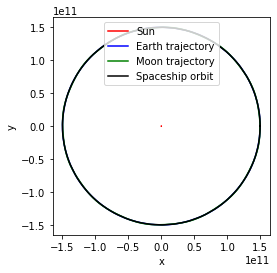

In [116]:
fig=plt.figure()
fig.add_subplot(1,1,1).set_aspect(1)
plt.xlabel('x')
plt.ylabel('y')
plt.plot(spaceShip.y[0],spaceShip.y[1],color='red',label='Sun')
plt.plot(spaceShip.y[3],spaceShip.y[4],color='blue',label='Earth trajectory')
plt.plot(spaceShip.y[6],spaceShip.y[7],color='green',label='Moon trajectory')
plt.plot(spaceShip.y[9],spaceShip.y[10],color='black',label='Spaceship orbit')
plt.legend()

* Analyzing the spaceship and moon trajectories with respect to the Earth

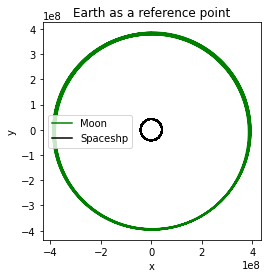

In [117]:
fig=plt.figure()
fig.add_subplot(1,1,1).set_aspect(1)
plt.title('Earth as a reference point')
plt.xlabel('x')
plt.ylabel('y')
plt.plot(spaceShip.y[6]-spaceShip.y[3],
         spaceShip.y[7]-spaceShip.y[4],
         color='green',
         label='Moon'
         )
plt.plot(spaceShip.y[9]-spaceShip.y[3],
         spaceShip.y[10]-spaceShip.y[4],
         color='black',
         label='Spaceshp'
         )
plt.legend()

### Elliptical orbit

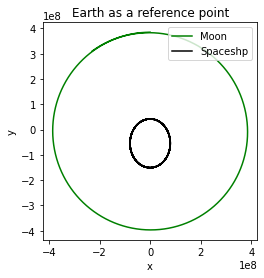

In [118]:
#this occurs when increasing the initial velocity of the spaceship slightly.
vOrbit0=np.array([-1.25*vOrbit,vEarth,0])
r0=np.concatenate([rSun0,rEarth0,rMoon0,rOrbit0,vSun0,vEarth0,vMoon0,vOrbit0])

#changing the tFinal to ease our life when analyzing and seeing the plotting results
#initial values that can be changed.
t0=0
numYears=1/12 # 1 month only
secondsToYears=60*60*24*365.25
tFinal=secondsToYears*numYears #measuring in years
nMax=100001
time=np.linspace(t0,tFinal,nMax)

spaceShip=integrate.solve_ivp(f,[t0,tFinal],r0,method='RK45',t_eval=time, rtol=0.000001*1e-3,atol=0.000001*1e-6)
fig=plt.figure()
fig.add_subplot(1,1,1).set_aspect(1)
plt.title('Earth as a reference point')
plt.xlabel('x')
plt.ylabel('y')
plt.plot(spaceShip.y[6]-spaceShip.y[3],
         spaceShip.y[7]-spaceShip.y[4],
         color='green',
         label='Moon'
         )
plt.plot(spaceShip.y[9]-spaceShip.y[3],
         spaceShip.y[10]-spaceShip.y[4],
         color='black',
         label='Spaceshp'
         )
plt.legend()

* The position of the spaceship w.r.t to time

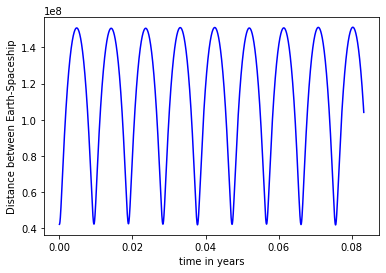

In [119]:
plt.xlabel("time in years")
plt.ylabel("Distance between Earth-Spaceship")
plt.plot(spaceShip.t/(secondsToYears),
    np.linalg.norm(spaceShip.y[3:6]-spaceShip.y[9:12],axis=0)
    ,color='blue')
#We can see from the plot how the distance between changes from (0.4 to 1.4 approximately)  resulting in an elliptical trajectory.

* The velocity of the spaceship w.r.t Earth 

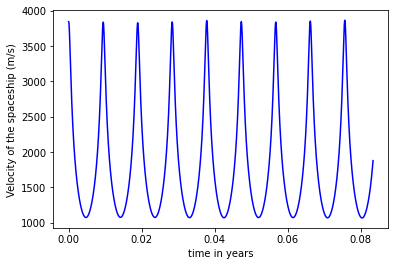

In [120]:
plt.xlabel("time in years")
plt.ylabel("Velocity of the spaceship (m/s)")
plt.plot(spaceShip.t/(secondsToYears),
    np.linalg.norm(spaceShip.y[15:18]-spaceShip.y[21:24],axis=0)
    ,color='blue')
# The lowest velocity corresponds to when the spaceship is the furthest from earth

### Escaping from Earth

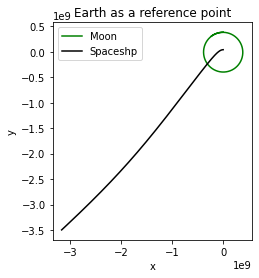

In [121]:
# This occurs by increasing the initial velocity of the spaceship even more.
vOrbit0=np.array([-1.5*vOrbit,vEarth,0])
r0=np.concatenate([rSun0,rEarth0,rMoon0,rOrbit0,vSun0,vEarth0,vMoon0,vOrbit0])

#initial values that can be changed.
t0=0
numYears=1/12
secondsToYears=60*60*24*365.25
tFinal=secondsToYears*numYears #measuring in years
nMax=100001
time=np.linspace(t0,tFinal,nMax)

spaceShip=integrate.solve_ivp(f,[t0,tFinal],r0,method='RK45',t_eval=time, rtol=0.000001*1e-3,atol=0.000001*1e-6)
fig=plt.figure()
fig.add_subplot(1,1,1).set_aspect(1)
plt.title('Earth as a reference point')
plt.xlabel('x')
plt.ylabel('y')
plt.plot(spaceShip.y[6]-spaceShip.y[3],
         spaceShip.y[7]-spaceShip.y[4],
         color='green',
         label='Moon'
         )
plt.plot(spaceShip.y[9]-spaceShip.y[3],
         spaceShip.y[10]-spaceShip.y[4],
         color='black',
         label='Spaceshp'
         )
plt.legend()

#The effect of the Earth gravitational force on the spaceship becomes negligable
#and what happens then is that the gravity of the sun will have much more effect on the 
#spaceship, so the motion of the spaceship will be effected by the sun 

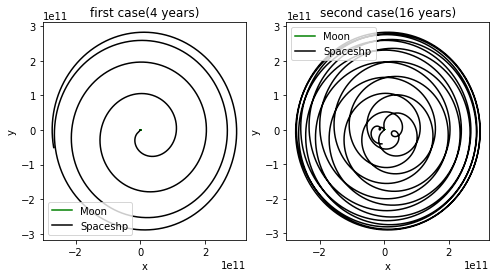

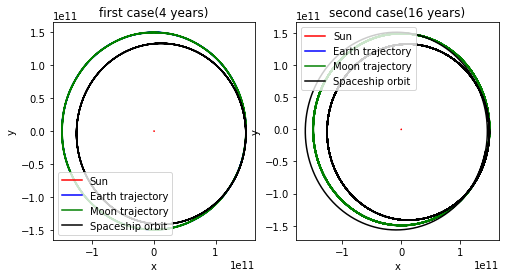

In [122]:
#we will increase the number of years to see what's happening on a larger scale.

#first case:
numYears=4
tFinal=secondsToYears*numYears #measuring in years
nMax=100001
time=np.linspace(t0,tFinal,nMax)
spaceShip=integrate.solve_ivp(f,[t0,tFinal],r0,method='RK45',t_eval=time, rtol=0.000001*1e-3,atol=0.000001*1e-6)


#second case:
numYears=16
tFinal=secondsToYears*numYears #measuring in years
nMax=100001
time=np.linspace(t0,tFinal,nMax)
spaceShip2=integrate.solve_ivp(f,[t0,tFinal],r0,method='RK45',t_eval=time, rtol=0.000001*1e-3,atol=0.000001*1e-6)

#plotting:
fig = plt.figure(figsize=plt.figaspect(0.5))
ax1=fig.add_subplot(1, 2, 1)
ax2=fig.add_subplot(1, 2, 2)
ax1.set_title('first case(4 years)')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.plot(spaceShip.y[6]-spaceShip.y[3],
         spaceShip.y[7]-spaceShip.y[4],
         color='green',
         label='Moon'
         )
ax1.plot(spaceShip.y[9]-spaceShip.y[3],
         spaceShip.y[10]-spaceShip.y[4],
         color='black',
         label='Spaceshp'
         )

ax2.set_title('second case(16 years)')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.plot(spaceShip2.y[6]-spaceShip2.y[3],
         spaceShip2.y[7]-spaceShip2.y[4],
         color='green',
         label='Moon'
         )
ax2.plot(spaceShip2.y[9]-spaceShip2.y[3],
         spaceShip2.y[10]-spaceShip2.y[4],
         color='black',
         label='Spaceshp'
         )
ax1.legend()
ax2.legend()

#another plot:
fig = plt.figure(figsize=plt.figaspect(0.5))
ax1=fig.add_subplot(1, 2, 1)
ax2=fig.add_subplot(1, 2, 2)
ax1.set_title('first case(4 years)')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.plot(spaceShip.y[0],spaceShip.y[1],color='red',label='Sun')
ax1.plot(spaceShip.y[3],spaceShip.y[4],color='blue',label='Earth trajectory')
ax1.plot(spaceShip.y[6],spaceShip.y[7],color='green',label='Moon trajectory')
ax1.plot(spaceShip.y[9],spaceShip.y[10],color='black',label='Spaceship orbit')
ax1.legend()

ax2.set_title('second case(16 years)')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.plot(spaceShip2.y[0],spaceShip2.y[1],color='red',label='Sun')
ax2.plot(spaceShip2.y[3],spaceShip2.y[4],color='blue',label='Earth trajectory')
ax2.plot(spaceShip2.y[6],spaceShip2.y[7],color='green',label='Moon trajectory')
ax2.plot(spaceShip2.y[9],spaceShip2.y[10],color='black',label='Spaceship orbit')
ax2.legend()

#showing all plots 
plt.show()

#You can see that the spaceship re-enters the orbit every once in a while and
#becomes very close to earth (And we will see this in more details in the next cells)

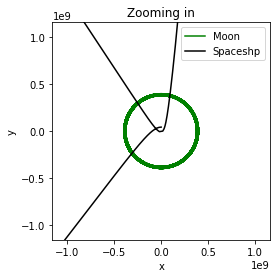

In [123]:
#focusing on the 16 years case to analyze as it describes 
# a longer time interval.

fig=plt.figure()
fig.add_subplot(1,1,1).set_aspect(1)
plt.title('Zooming in')
plt.xlabel('x')
plt.ylabel('y')
plt.xlim([-3*rEarthMoon,3*rEarthMoon])
plt.ylim([-3*rEarthMoon,3*rEarthMoon])
plt.plot(spaceShip2.y[6]-spaceShip2.y[3],
         spaceShip2.y[7]-spaceShip2.y[4],
         color='green',
         label='Moon'
         )
plt.plot(spaceShip2.y[9]-spaceShip2.y[3],
         spaceShip2.y[10]-spaceShip2.y[4],
         color='black',
         label='Spaceshp'
         )
plt.legend()
#you can see that the spaceship almost hits earth as it re-enters the orbit before
#leaving it once again.

* Distance from earth

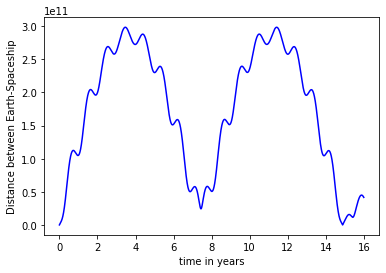

In [124]:
#focusing on the 16 years case still.
plt.xlabel("time in years")
plt.ylabel("Distance between Earth-Spaceship")
plt.plot(spaceShip2.t/(secondsToYears),
    np.linalg.norm(spaceShip2.y[3:6]-spaceShip2.y[9:12],axis=0)
    ,color='blue')


### Earth escape via moon encouter

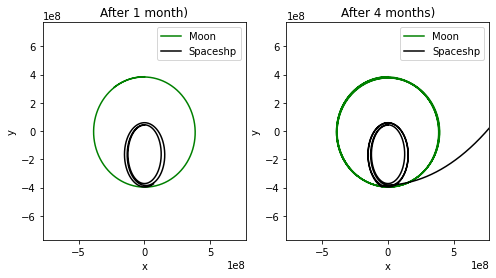

In [125]:
# what if the initial velocity provided was to result in an 
#elliptical orbit, where the spaceship becomes very close to the moon.
vOrbit0=np.array([-1.34*vOrbit,vEarth,0])
r0=np.concatenate([rSun0,rEarth0,rMoon0,rOrbit0,vSun0,vEarth0,vMoon0,vOrbit0])

#initial values that can be changed.
#after 1 month case:
t0=0
numYears=1/12 # after a month
secondsToYears=60*60*24*365.25
tFinal=secondsToYears*numYears #measuring in years
nMax=100001
time=np.linspace(t0,tFinal,nMax)
spaceShip=integrate.solve_ivp(f,[t0,tFinal],r0,method='RK45',t_eval=time, rtol=0.000001*1e-3,atol=0.000001*1e-6)

#after 4 months case:
t0=0
numYears=4/12 # after 4 month
secondsToYears=60*60*24*365.25
tFinal=secondsToYears*numYears #measuring in years
nMax=100001
time=np.linspace(t0,tFinal,nMax)
spaceShip2=integrate.solve_ivp(f,[t0,tFinal],r0,method='RK45',t_eval=time, rtol=0.000001*1e-3,atol=0.000001*1e-6)

#plotting the 2 cases
fig = plt.figure(figsize=plt.figaspect(0.5))
ax1=fig.add_subplot(1, 2, 1)
ax2=fig.add_subplot(1, 2, 2)
ax1.set_title('After 1 month)')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_xlim([-2*rEarthMoon,2*rEarthMoon])
ax1.set_ylim([-2*rEarthMoon,2*rEarthMoon])
ax1.plot(spaceShip.y[6]-spaceShip.y[3],
         spaceShip.y[7]-spaceShip.y[4],
         color='green',
         label='Moon'
         )
ax1.plot(spaceShip.y[9]-spaceShip.y[3],
         spaceShip.y[10]-spaceShip.y[4],
         color='black',
         label='Spaceshp'
         )

ax2.set_title('After 4 months)')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_xlim([-2*rEarthMoon,2*rEarthMoon])
ax2.set_ylim([-2*rEarthMoon,2*rEarthMoon])
ax2.plot(spaceShip2.y[6]-spaceShip2.y[3],
         spaceShip2.y[7]-spaceShip2.y[4],
         color='green',
         label='Moon'
         )
ax2.plot(spaceShip2.y[9]-spaceShip2.y[3],
         spaceShip2.y[10]-spaceShip2.y[4],
         color='black',
         label='Spaceshp'
         )
ax1.legend()
ax2.legend()
#As seen, the elliptical orbit of the spaceship is extended to reach the moon, and 
#the spaceship is affected by the moon's gravity even more, so it provides it with 
# sufficient acceleration to escape the earth's orbit. 
# This is beneficial because we can now achieve the same results as before 
# but with lower initial velocity(therefore lower cost)

* Distance between the moon and the spaceship

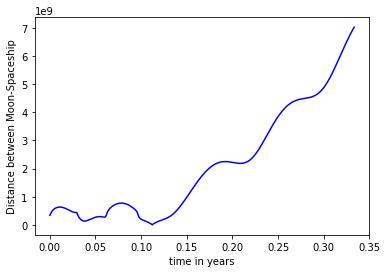

In [126]:
#After 4 months case
plt.xlabel("time in years")
plt.ylabel("Distance between Moon-Spaceship")
plt.plot(spaceShip2.t/(secondsToYears),
    np.linalg.norm(spaceShip2.y[6:9]-spaceShip2.y[9:12],axis=0)
    ,color='blue')

#If we were abale to brake the spaceship when the distance is the lowest
# we can get the spaceship to land on the moon.

### Orbiting the moon

We have already achieved a trajectory that approached the moon. To reach a stable orbit, we must decrease the relative velocity of the spaceship once it is close to the moon. We will temporarily apply a force that breaks the spaceship relative to the moon.

The fourth differential equation becomes:

$$
\ddot{\vec{r}_4}=
G\frac{m_1}{|\vec{r}_1-\vec{r}_4|^3}\vec{r}_1 + G\frac{m_2}{|\vec{r}_2-\vec{r}_4|^3}\vec{r}_2+ G\frac{m_3}{|\vec{r}_3-\vec{r}_4|^3}\vec{r}_3 -G\left(\frac{m_1}{|\vec{r}_1-\vec{r}_4|^3}+\frac{m_2}{|\vec{r}_2-\vec{r}_4|^3}+\frac{m_3}{|\vec{r}_3-\vec{r}_4|^3}\right)\vec{r}_4 - \frac{F(t)}{m_4}\vec{e_{v_\mathrm{rel}}}
$$
with 

$$
\vec{e_{v_\mathrm{rel}}}=\frac{\dot{\vec{r}}_4-\dot{\vec{r}}_3}{\left|\dot{\vec{r}}_4-\dot{\vec{r}}_3\right|}
$$

In [127]:
#to generate a force that works only at specific times, we  will use np.heaviside()
#which generates a step size function.
def f(t,r,A,tOn,tOff):
    r1=r[0:3]
    r2=r[3:6]
    r3=r[6:9]
    r4=r[9:12]
    v1=r[12:15]
    v2=r[15:18]
    v3=r[18:21]
    v4=r[21:24]
    fBrake=A*(np.heaviside(t-tOn,1)-np.heaviside(t-tOff,1))
    #A:Magnitude of the force
    #tOn: time when the braking force should be applied
    #tOff: time when the braking force should be turned off
    #                                     --------------
    #                                    |              |          
    #np.heaviside()-np.heavisde():-------|              |-----------
    r12=np.linalg.norm(r1-r2)
    r23=np.linalg.norm(r2-r3)
    r31=np.linalg.norm(r3-r1)
    r14=np.linalg.norm(r1-r4)
    r24=np.linalg.norm(r2-r4)
    r34=np.linalg.norm(r3-r4)
    accArray=G*np.array([
        -(m2/r12**3 + m3/r31**3)*r1 + (m2/r12**3) *r2 + (m3/r31**3)*r3,
        (m1/r12**3 )*r1 - (m1/r12**3 + m3/r23**3)*r2 + (m3/r23**3)*r3,
        (m1/r31**3 )*r1 + (m2/r23**3)*r2 - (m1/r31**3 + m2/r23**3)*r3,
        (m1/r14**3 )*r1 + (m2/r24**3)*r2 + (m3/r34**3)*r3 -(m1/r14**3 + m2/r24**3 + m3/r34**3)*r4
        -fBrake*(v4-v3)/np.linalg.norm(v4-v3)
             
    ])
    return np.concatenate([v1,v2,v3,v4,accArray.flatten()] )

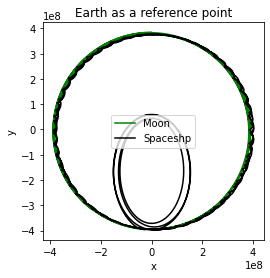

In [128]:
vOrbit0=np.array([-1.34*vOrbit,vEarth,0])
r0=np.concatenate([rSun0,rEarth0,rMoon0,rOrbit0,vSun0,vEarth0,vMoon0,vOrbit0])

#initial values that can be changed.
t0=0
numYears=4/12 # 4 months
secondsToYears=60*60*24*365.25
tFinal=secondsToYears*numYears #measuring in years
nMax=100001
time=np.linspace(t0,tFinal,nMax)
A=80*10**6 #(you have to use trial and error method to guess this one)
tOn= 0.11*secondsToYears #(you can see from the above plot when the distance is minimal)
tOff=0.115*secondsToYears#(you know it can't be much different from tOn, but you have to use 
           #trial and error method to guess it)

spaceShip=integrate.solve_ivp(f,[t0,tFinal],r0,method='RK45',t_eval=time, rtol=0.000001*1e-3,
         atol=0.000001*1e-6,args=(A,tOn,tOff))
fig=plt.figure()
fig.add_subplot(1,1,1).set_aspect(1)
plt.title('Earth as a reference point')
plt.xlabel('x')
plt.ylabel('y')
plt.plot(spaceShip.y[6]-spaceShip.y[3],
         spaceShip.y[7]-spaceShip.y[4],
         color='green',
         label='Moon'
         )
plt.plot(spaceShip.y[9]-spaceShip.y[3],
         spaceShip.y[10]-spaceShip.y[4],
         color='black',
         label='Spaceshp'
         )
plt.legend()
#I guess the output is good enough.

* Distance between the moon and the spaceship

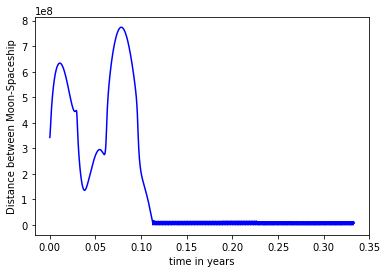

In [130]:
plt.xlabel("time in years")
plt.ylabel("Distance between Moon-Spaceship")
plt.plot(spaceShip.t/(secondsToYears),
    np.linalg.norm(spaceShip.y[6:9]-spaceShip.y[9:12],axis=0)
    ,color='blue')